<a href="https://colab.research.google.com/github/shaik-shabana05/KNN-Project/blob/main/S_KNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## U shape

In [ ]:
!pip install mlxtend==0.22.0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import  cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/ushape.csv')

In [ ]:
data.shape

(99, 3)

In [ ]:
data.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
data.rename(columns={'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=True)

In [ ]:
data.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
data.columns

Index(['X', 'Y', 'class'], dtype='object')

In [ ]:
data['class']

,class
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
94,1.0
95,1.0
96,1.0
97,0.0


K value: 1 train score: 1.0 cv score: 0.9404761904761905
K value: 2 train score: 0.9710144927536232 cv score: 0.9238095238095237
K value: 3 train score: 0.9855072463768116 cv score: 0.9095238095238095
K value: 4 train score: 0.9420289855072463 cv score: 0.8809523809523808
K value: 5 train score: 0.9565217391304348 cv score: 0.8952380952380953
K value: 6 train score: 0.9130434782608695 cv score: 0.8809523809523808
K value: 7 train score: 0.9420289855072463 cv score: 0.8952380952380953
K value: 8 train score: 0.9420289855072463 cv score: 0.9261904761904762
K value: 9 train score: 0.927536231884058 cv score: 0.9095238095238095
K value: 10 train score: 0.927536231884058 cv score: 0.9261904761904762
K value: 20 train score: 0.9130434782608695 cv score: 0.8976190476190478
K value: 50 train score: 0.8695652173913043 cv score: 0.8404761904761905


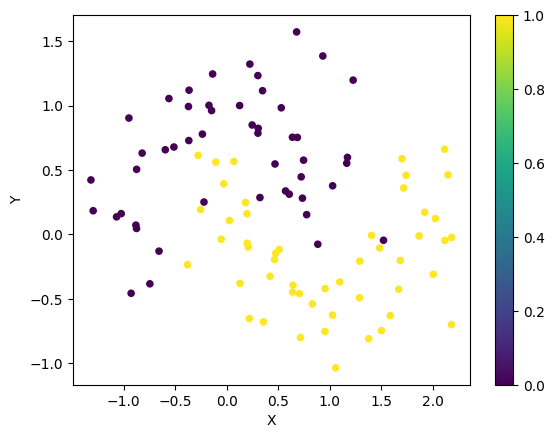

In [ ]:
data.plot(x='X',y='Y', c=data['class'],kind='scatter',colormap='viridis')
x=data[['X','Y']].values
y=data['class'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)  # this is for data splitting into groups

from sklearn.preprocessing import StandardScaler  # scaling data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier  #fit the data into algorithm
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

for i in [1,2,3,4,5,6,7,8,9,10,20,50]: # hit and trail method
  knn=KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) #training the model
  print("K value:",i, "train score:",knn.score(x_train,y_train),"cv score:",np.mean(cross_val_score(knn,x_train,y_train,cv=10)))  # predicting using the model

In [ ]:
#store the cross-validation scores for each k value
cv_scores={}
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsClassifier(i) #intialising the model
  knn.fit(x_train,y_train) #training the model
  cv_score=np.mean(cross_val_score(knn,x_train,y_train,cv=10))
  cv_scores[i]=cv_score
  print("k value:",i,"train score:",knn.score(x_train,y_train),"cv score:",cv_score) #predicting using the model

# Find the best k value based on the maximum cross-validation score
best_k=max(cv_scores,key=cv_scores.get) # best value of k
print(f"\nBest k value: {best_k}")

k value: 1 train score: 1.0 cv score: 0.9404761904761905
k value: 2 train score: 0.9710144927536232 cv score: 0.9238095238095237
k value: 3 train score: 0.9855072463768116 cv score: 0.9095238095238095
k value: 4 train score: 0.9420289855072463 cv score: 0.8809523809523808
k value: 5 train score: 0.9565217391304348 cv score: 0.8952380952380953
k value: 6 train score: 0.9130434782608695 cv score: 0.8809523809523808
k value: 7 train score: 0.9420289855072463 cv score: 0.8952380952380953
k value: 8 train score: 0.9420289855072463 cv score: 0.9261904761904762
k value: 9 train score: 0.927536231884058 cv score: 0.9095238095238095
k value: 10 train score: 0.927536231884058 cv score: 0.9261904761904762
k value: 20 train score: 0.9130434782608695 cv score: 0.8976190476190478
k value: 50 train score: 0.8695652173913043 cv score: 0.8404761904761905

Best k value: 1


/tmp/ipython-input-922074219.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_train,y=y_train.astype(np.integer),clf=knn_best,legend=2)


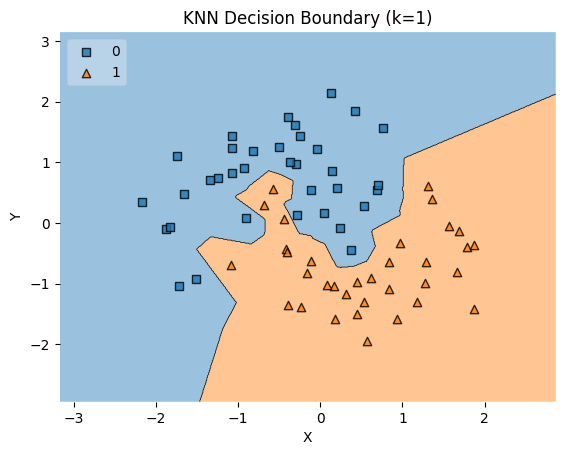

In [ ]:
#Train the KNN model with the best k value
knn_best=KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train,y_train)

#Visualize the decision boundary  for KNN with the best k
plot_decision_regions(X=x_train,y=y_train.astype(np.integer),clf=knn_best,legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'KNN Decision Boundary (k={best_k})')
plt.show()


In [ ]:
# Train the KNN model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)

# Predict on the test data
y_pred = knn_best.predict(x_test)

print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1.]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8666666666666667
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC
try:
  # For binary classification, use the probability of the positive class
  y_pred_proba = knn_best.predict_proba(x_test)[:, 1]
  auc_roc = roc_auc_score(y_test, y_pred_proba)
  print(f"AUC-ROC: {auc_roc}")
except Exception as e:
  print(f"Could not calculate AUC-ROC: {e}")

# Accuracy and F1-score were already calculated in the previous cell, but we can print them again for clarity
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

AUC-ROC: 0.8660714285714286
Accuracy: 0.8666666666666667
F1 Score: 0.875
